# FINAL PYTHON PROJECT

## 'PERSONAL FINANCE MANAGER TOOL'

# INTRODUCTION

The Personal Finance Manager tool is a user-friendly solution designed to ease personal finance management. It enables users to track, categorize, and visualize daily expenses across various categories like groceries, mortgage, and entertainment. Utilizing Python, ipywidgets for easy interaction, and Seaborn for data visualization, this tool not only simplifies budgeting but also promotes financial awareness by providing a clear overview of spending habits. With features to save data in a CSV format, it's an invaluable resource for anyone seeking to optimize their financial health.



# Objectives

## Track and Categorize Expenses
- **Enable users to input and categorize their daily expenses** into various categories such as Grocery, Mortgage, Entertainment, Transportation, Insurance, and Miscellaneous. This is crucial for organizing and understanding where money is being spent.

## Visualize Spending Trends Over Time
- **Implement functionality to generate visual representations**, like time-series plots, using Seaborn. This feature allows users to see their spending patterns over time, aiding in the identification of potential areas for budget adjustment.

## Easy and Intuitive User Interface
- **Utilize ipywidgets to create a user-friendly interface** that is accessible even for non-technical users. The aim is to make logging and reviewing expenses as simple and straightforward as possible.

## Data Persistence
- **Provide the capability to save entered expense data into a CSV file**. This ensures that data is not lost between sessions and can be accessed later for review or analysis.

## Generate Monthly Reports
- **Enable users to generate summary reports of their monthly expenses**. These reports are designed to give insights into monthly spending habits, assisting users in more effective budgeting.

## Promote Financial Awareness and Budgeting
- **Encourage regular use of the tool to enhance financial awareness**. By becoming more aware of their spending habits, users can make better personal finance management and budgeting decisions.


In [1]:
# Import necessary libraries
# Pandas is used to create and handle the DataFrame that stores expense data
import pandas as pd

# Seaborn is built on top of matplotlib and provides a high-level interface 
# for drawing attractive and informative statistical graphics.
import seaborn as sns
import matplotlib.pyplot as plt

# ipywidgets library is used to create interactive UI elements (widgets) in Jupyter Notebooks.
import ipywidgets as widgets
# iPython.display is a function  to display widgets in the Jupyter Notebook.
from IPython.display import display


In code below, a DataFrame named **expenses_df** is created with specific column names. These columns represent the different expense categories and the date of the transaction. This DataFrame acts as the primary data structure to store all the expense entries added by the user.

In [2]:
# Initialize an empty DataFrame for expenses
columns = ['Date', 'Grocery', 'Mortgage', 'Entertainment', 'Transportation', 'Insurance', 'Miscellaneous']
expenses_df = pd.DataFrame(columns=columns)




**UI Widgets:** This part of the code is where I create the interactive components (widgets) that users will interact with in the Jupyter Notebook.

- **`widgets.FloatText`:** These are input fields where users can enter numerical values (floating-point numbers). I create one for each expense category such as Grocery, Mortgage, Entertainment, etc.
  - `description='Grocery:'` sets the label for the input field, so users know this field is for entering grocery expenses.

- **`widgets.DatePicker`:** This is a widget that allows users to select a date from a calendar. It's used here for selecting the date of the expense.
  - `description='Date:'` sets the label for the date picker.

- **`widgets.Button`:** These are clickable buttons, each triggering different actions.
  - `description='Add Expense'`: This button, when clicked, will trigger an action to add the entered expenses to a list or table.
  - `description='Save Data'`: Clicking this button will save the entered data to a file.
  - `description='Load Data'`: This button is used to load data from a previously saved file.
  - `description='Plot Trends'`: Clicking this button will generate a visual representation (plot) of the expense trends.

Each widget is created and assigned to a variable (like `grocery_input`, `add_button`, etc.). These variables are used later in the code to access the values entered by the user or to define actions when buttons are clicked.

The creation of these widgets is essential for making the Personal Finance Manager interactive and user-friendly. They provide the interface through which users can input data, save it, load previously saved data, and visualize expense trends.


In [3]:
# Define UI widgets
grocery_input = widgets.FloatText(description='Grocery:')
mortgage_input = widgets.FloatText(description='Mortgage:')
entertainment_input = widgets.FloatText(description='Entertainment:')
transportation_input = widgets.FloatText(description='Transportation:')
insurance_input = widgets.FloatText(description='Insurance:')
miscellaneous_input = widgets.FloatText(description='Miscellaneous:')
date_picker = widgets.DatePicker(description='Date:')
add_button = widgets.Button(description='Add Expense')
save_button = widgets.Button(description='Save Data')
load_button = widgets.Button(description='Load Data')
plot_button = widgets.Button(description='Plot Trends')


In [4]:
# Event handler functions
def add_expense(b):
    """
    Add a new expense entry to the DataFrame.

    This function gathers data from the input widgets, creates a dictionary representing a new expense entry,
    and appends this entry to the global DataFrame 'expenses_df'. Each key in the dictionary corresponds to a column
    in the DataFrame. The function is designed to be triggered by the 'Add Expense' button.

    Parameters:
    b (widgets.Button): The widget instance (button) that triggered this function. 
                        This is a standard parameter for widget event handlers in ipywidgets, 
                        even though it's not explicitly used in the function.

    """
    expense_date = pd.to_datetime(date_picker.value).strftime('%Y-%m-%d') if date_picker.value else 'N/A'

    new_expense = {
        'Date': expense_date,
        'Grocery': grocery_input.value,
        'Mortgage': mortgage_input.value,
        'Entertainment': entertainment_input.value,
        'Transportation': transportation_input.value,
        'Insurance': insurance_input.value,
        'Miscellaneous': miscellaneous_input.value
    }
    global expenses_df
    # Append new expense and ensure numeric types for the expense columns
    expenses_df = expenses_df.append(new_expense, ignore_index=True)
    for col in expenses_df.columns[1:]:
        expenses_df[col] = pd.to_numeric(expenses_df[col], errors='coerce')
    print("Expense added!")

def save_data(b):
    """
    Save the DataFrame to a CSV file.

    This function saves the current state of the 'expenses_df' DataFrame to a CSV file named 'expenses.csv'.
    It is triggered by the 'Save Data' button. The function ensures that the data entered by the user is stored
    persistently and can be retrieved later.

    Parameters:
    b (widgets.Button): The widget instance (button) that triggered this function.

    """
    expenses_df.to_csv('expenses.csv', index=False)
    print("Data saved to 'expenses.csv'")

def load_data(b):
    """
    Load data from a CSV file into the DataFrame.

    This function loads data from a CSV file named 'expenses.csv' into the 'expenses_df' DataFrame. 
    It is useful for retrieving previously saved expense data. The function is designed to be triggered 
    by the 'Load Data' button.

    Parameters:
    b (widgets.Button): The widget instance (button) that triggered this function.

    """
    global expenses_df
    expenses_df = pd.read_csv('expenses.csv', parse_dates=['Date'])
    print("Data loaded from 'expenses.csv'")





In [5]:
def plot_trends(b):
    # Plot the monthly trends of expenses over time using a stacked area chart
    expenses_df['Date'] = pd.to_datetime(expenses_df['Date'])
    df_plot = expenses_df.set_index('Date')
    monthly_expenses = df_plot.resample('M').sum()
    monthly_expenses.plot.area(figsize=(12, 6))
    plt.title('Monthly Expenses Trends Over Time')
    plt.ylabel('Amount')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.show()

# Assign event handlers to buttons
add_button.on_click(add_expense)
save_button.on_click(save_data)
load_button.on_click(load_data)
plot_button.on_click(plot_trends)

Next, I assigned Event Handlers to button.  Event Handlers are functions  that are triggered when a specific event occurs, like a button click. Here are the buttons I added:

**add_expense**: Called when the 'Add Expense' button is clicked. It reads values from input widgets, creates a dictionary, and appends it to the DataFrame.
**save_data**: Triggered by the 'Save Data' button. It saves the current state of expenses_df to a CSV file.
**load_data**: Activated by the 'Load Data' button. It loads data from a CSV file into expenses_df.

In [6]:
# Assign event handlers to buttons
add_button.on_click(add_expense)
save_button.on_click(save_data)
load_button.on_click(load_data)
plot_button.on_click(plot_trends)


**Button Event Assignment**: This code associates the above-defined functions with the corresponding buttons. For instance, clicking the 'Add Expense' button will now call the add_expense function.

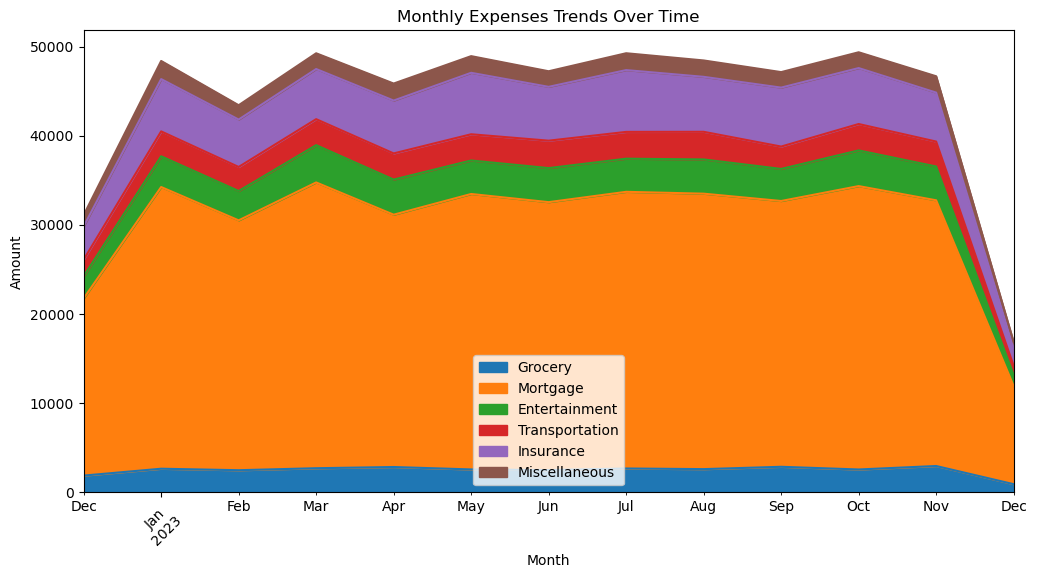

In [7]:
# Display the UI
display(widgets.VBox([grocery_input, mortgage_input, entertainment_input, transportation_input, insurance_input, miscellaneous_input, date_picker, add_button, save_button, load_button, plot_button]))


# Using the Personal Finance Manager Tool

## How to Use the User Interface (UI)

### Adding Expenses
- **Enter Grocery Dollar Amount**: 
  - Locate the 'Grocery' input field.
  - Type in the amount you spent on groceries. For example, if you spent $50, simply type `50`.
- **Enter Amounts for Other Categories**: 
  - Follow the same steps for other categories like Mortgage, Entertainment, Transportation, Insurance, and Miscellaneous.
- **Select the Date of Expense**: 
  - Click on the 'Date' picker.
  - Choose the date when the expense occurred.

### Saving and Loading Data
- **To Save Data**: 
  - After adding all your expenses, click on the 'Save Data' button.
  - This will save your data into a CSV file, ensuring it is stored and can be retrieved later.
- **To Load Data**: 
  - Click on the 'Load Data' button.
  - This will load your previously saved expense data from the CSV file.

### Visualizing Data
- **To Plot Data**: 
  - Once you have entered and/or loaded your data, click on the 'Plot Trends' button.
  - This will generate a visual representation of your expenses over time, helping you understand your spending patterns.

By following these steps, you can effectively manage and analyze your personal finances using this tool. Remember to save your data regularly and utilize the visualization feature to keep track of your expenses.


Since I do not real data, I used random but realistic sounding data to test my tools and visualizations. Below is the code I used to generate the numbers. 

In [8]:
import pandas as pd
from datetime import datetime, timedelta
import random

# Function to generate realistic expenses data for 12 months
def generate_expenses_data(start_date, num_days):
    dates = pd.date_range(start_date, periods=num_days, freq='D')
    data = {
        'Date': dates.strftime('%Y-%m-%d').tolist(),
        'Grocery': [round(random.uniform(30, 150), 2) for _ in range(num_days)],
        'Mortgage': [round(random.uniform(800, 1200), 2) for _ in range(num_days)],
        'Entertainment': [round(random.uniform(50, 200), 2) for _ in range(num_days)],
        'Transportation': [round(random.uniform(40, 150), 2) for _ in range(num_days)],
        'Insurance': [round(random.uniform(100, 300), 2) for _ in range(num_days)],
        'Miscellaneous': [round(random.uniform(20, 100), 2) for _ in range(num_days)]
    }
    return pd.DataFrame(data)

# Generate 12 months of expenses data
start_date_12_months_ago = datetime.now() - timedelta(days=365)
expenses_df = generate_expenses_data(start_date_12_months_ago, 365)

# Save the data to a CSV file
csv_file_path = 'expenses.csv'
expenses_df.to_csv(csv_file_path, index=False)

csv_file_path

'expenses.csv'

# Areas for Improvement and Expansion

As I continue to evolve the Personal Finance Manager Tool, there are several areas where I can enhance its functionality and user experience. Here are three key areas for improvement and expansion:

## 1. Advanced Data Analysis and Reporting
- **Incorporate More Detailed Financial Analytics**: Implement more sophisticated data analysis features, like predictive analytics for budget forecasting or categorizing expenses using machine learning algorithms.
- **Customizable Reports**: Enable users to create customizable reports, with options to select specific data points, time frames, and visual styles.

## 2. Integration with External Financial Tools and Platforms
- **Banking and Credit Card Integration**: Develop capabilities to link the tool with users' banking and credit card accounts for automatic transaction imports. This would streamline the data entry process and ensure accuracy in expense tracking.
- **Support for Multiple Currencies**: Expand the tool's functionality to support multiple currencies, catering to users who travel frequently or have international financial obligations.

## 3. Enhanced User Interface and Experience
- **Mobile Application Development**: Create a mobile version of the tool for on-the-go expense tracking and analysis.
- **User Interface Improvements**: Continuously improve the user interface for greater intuitiveness, including customizable themes, interactive dashboards, and responsive design for various screen sizes.



# Conclusion

## Achievements of the Personal Finance Manager Tool

In conclusion, the **Personal Finance Manager Tool** represents a significant stride in simplifying personal finance management. It stands out as a testament to the power of combining technology with user-centric design. Key achievements include:

- **Efficient Expense Tracking and Categorization**: The tool has successfully enabled users to meticulously track and categorize their daily expenses, fostering a more organized approach to personal finance.

- **Insightful Visualization of Financial Data**: With the integration of Seaborn for data visualization, users have been empowered to visualize their spending trends effectively, offering invaluable insights into their financial habits.

- **User-Friendly Interface**: The utilization of ipywidgets has resulted in an interface that is not only intuitive but also accessible to users of all technical backgrounds, thereby democratizing the use of financial management tools.

- **Reliable Data Persistence and Accessibility**: The tool's ability to save and retrieve data ensures continuity and long-term analysis of financial trends, a crucial aspect of effective financial planning.

- **Promotion of Financial Literacy and Awareness**: Above all, this tool serves as a catalyst for users to cultivate better financial awareness and decision-making skills, which are vital in today's world.

As I conclude this project, it's clear that the **Personal Finance Manager Tool** is not just a utility; it's a step towards empowering individuals to take control of their financial future. It exemplifies how technology can be leveraged to enhance everyday life, making complex tasks like financial management both manageable and insightful.
